# Lekce 6

## Korelace

V reálném světě se často stává, že nějaká skutečnost má vliv na něco jiného. Npaříklad čas strávený studiem má vliv na body. V souboru [Student_Marks.csv](Student_Marks.csv) jsou data o průměrné době, kterou uživatelé strávili studiem on-line kurzu, a průměrným počtem bodů, které z kurzů dostali. Podívejme se, jak silný je vliv doby strávené studiem na bodový výsledek.

In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


K zobrazení použijeme bodový graf (*scatter plot*). Na vodorovné ose máme průměrný čas strávený studiem a na svislé ose průměrný počet bodů. Vidíme, že známka má tendenci růst s tím, jak roste čas strávený studiem. Současně je patrný jistý vliv náhody. Takové závislosti se říká stochastická závislost (*stochastic dependence*). Dále platí, že závislost je lineární (*linear*), tj. kdybychom ho chtěly popsat pomocí matematické funkce, mohli bychom použít přímku.

<Axes: xlabel='time_study', ylabel='Marks'>

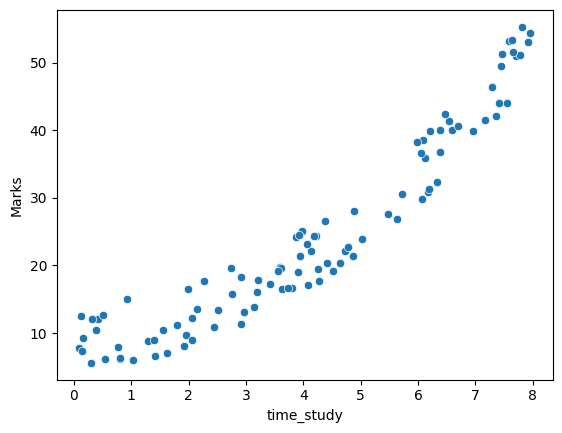

In [4]:
sns.scatterplot(data=data, x="time_study", y="Marks")

Takové závislosti říkáme **korelace** (*correlation*) a to, jak je závislost silná, můžeme popsat pomocí **korelačního koeficientu** (*correlation coefficient*). Pro jeho hodnoty platí následující:

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
- Hodnoty blízko 0 znamenají lineární nezávislost.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku.

In [5]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


Korelace automaticky neznamená, že obě veličiny se vzájemně ovlivňují. Uvažujme například počet turistů a počet komárů v kempu u přehrady. Obě veličiny jsou sice korelované, ale v důsledku počasí jako třetího vlivu. Pokud bychom například kemp zavřeli a počet turistů by klesl na nulu, počet komárů to nijak neovlivní.

Podobně můžeme "odhalit" korelaci, která je vy skutečnosti náhodná. Doslova legendárním příkladem se stala korelace mezi počtem lidí, kteří se utopili v důsledku pádu do bazénu, a počtem filmů, ve kterých hrál Nicolas Cage. Z logiky věci je jasné, že tyto veličiny se vzájemně nijak neovlivňují, přesto bychom mezi nimi našli vysokou korelaci.


### Test na normální rozdělení a test hypotéz na korelaci

Teoreticky je možné, že nějaká data, se kterými pracujeme, mají normální rozdělení. To se může často hodit. Některé statistické metody totiž mají **předpoklady**, které by měly být splněny, než je použijeme. Pokud nejsou předpoklady splněné, je vhodné použít alternativu. Například některé statistické testy hypotéz jsou označovány jako parametrické (*parametric*) a jiné jako neparametrické (*nonparametric*). Parametrické testy většinou předpokládají, že data mají normální rozdělení, neparametrické testy to nevyžadují.

Statistické testy jsou různě citlivé na odchylky od normality. Napříkald t-test je poměrně robustní (*robust*) a funguje dobře i pro data, která nemají normální rozdělení, pokud máme *dostatečné množství* dat (tj. minimálně vyšší desítky). Jiné testy jsou bohužel citlivější a v případě jejich využití bychom mohli dojít k nesprávnému závěru ohledně platnosti nulové hypotézy.

Pokud nevíme, zda jsou předpoklady splněné, můžeme je otestovat. Testování předpokladů probíhá stejně, jako v případě samotného testu zkoumaného problému. Začneme tedy formulací hypotéz. V případě, že testujeme, zda mají data normální rozdělení (často se říká "normalita data"), formulujeme hypotézy takto:

- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

Otestujme data z předchozí části, tj. data o počtech bodů z testu a času stráveného přípravou.

In [6]:
stats.normaltest(data["time_study"])

NormaltestResult(statistic=25.5005076365011, pvalue=2.9015838402429474e-06)

In [7]:
stats.normaltest(data["Marks"])

NormaltestResult(statistic=11.359451709608145, pvalue=0.003414494382329425)

Data tedy nemějí normální rozdělení. Nyní pokračujeme testem o závislosti. Nejprve si formulujeme hypotézy.

- H0: Mezi časem stráveným studiem a známkou z testu není závislost (korelační koeficient = 0).
- H1: Mezi časem stráveným studiem a známkou z testu je závislost (korelační koeficient není 0).

Opět porovnáváme mezi sebou dva různé sloupce v tabulce, proto budeme hledat mezi dvouvýběrovými testy. Dále pracujeme s tím, že testujeme statistickou závislost. Pokud data nemají normální rozdělení, můžeme využít dva testy - Spearmanův test nebo test založený na Kendallově tau. Vyzkoušejme tedy druhý test.

In [8]:
stats.kendalltau(data["time_study"], data["Marks"])

SignificanceResult(statistic=0.8343434343434345, pvalue=9.099861412072896e-35)

p-hodnota je menší než běžně používaná hladina významnosti 0.05, nulovou hypotézu tedy můžeme zamítnout. Mezi dobou strávenou studiem a známkou z kurzu existuje závislost.

## Regrese

Samotná informace o tom, že existuje statisticky významný vztah mezi obytnou plochou domu a jeho cenou, sice může být zajímavá, ale můžeme zjistit více. K tomu můžeme využít regresi. Regrese je nástroj, který umí vztah mezi dvěma proměnnými popsat. Abychom si pod slovem "popsat" dokázali něco představit, využijeme graf. Využijeme opět modul `seaborn`, tentokrát vygenerujeme graf pomocí funkce `regplot()`. U regrese vždy rozlušujeme mezi **závislou** (**vysvětlovanou**) a **nezávislou** (**vysvětlující**) proměnnou. Závislou proměnnou umísťujeme na svislou osu (*y*) a nezávislou vodorovnou osu (*x*). V našem případě je nezávislou proměnnou čas strávený studiem a závislou počet bodů. Tvrdíme totiž, že čas strávený studiem ovlivňuje počet bodů, tj. počet bodů vysvětlujeme pomocí času stráveného studiem.

Musíme si uvědomit, že výslednou známku ovlivňují i další vlivy - například únava studentů a studentek v době psaní testu, štěstí na otázky atd. Z toho důvodu neleží všechny body na regresní křivce, ale pohybují se kolem ní. Pokud jsou nad ní, pak byl skutečný výsledek studenta nebo studentky lepší, než kolik by predikoval náš model. Pokud je bod pod ní, pak je skutečný výsledek horší.

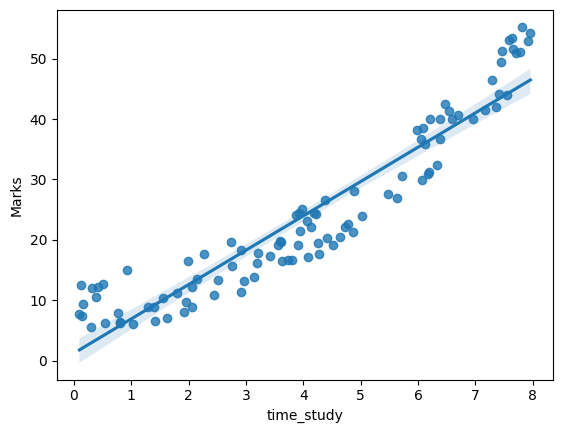

In [9]:
g = sns.regplot(data, x="time_study", y="Marks")

Pomocí této funkce dokážeme predikovat, kolik bodů student nebo studentka kurzu získá, a to na základě počtu hodin, které strávil(a) studiem.

Tato funkce je označovaná jako "lineární" a k jejímu vykreslení potřebujeme znát dvě hodnoty:

- První je hodnota, která určuje, kde leží průsečík s osou *y*. V našem případě jde o hodnotu, která udává počet bodů, který by získal(a) potenciální student(ka), který se na test vůbec nepřipravoval(a) (např. kolik otázek je možné si tipnout).
- Druhá je hodnota, která udává sklon funkce. Čím bude hodnota vyšší, tím více skloněná funkce bude. V našem případě toto číslo určí, kolik dodatečných bodů je možné získat hodinou studia navíc.

K zobrazení těchto hodnot můžeme použít modul *statmodels*. Ten zobrazí velkou tabulku se spoustou čísel, nás však budou zajímat pouze některá.

In [10]:
formula = "Marks ~ time_study"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.36e-48
Time:                        23:37:26   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podívejme se nejprve na dvě čísla (koeficienty - *coefficients*), která potřebujeme k nakreslení naší funkce:

- V řádku `intercept` máme hodnotu, která určuje, kde funkce protne se svislou osou.
- V řádku `time_study` máme hodnotu, která udává sklon funkce. Hodnota 5.6888 nám říká, že jedna hodina studia navíc přinese v průměru 5.6888 bodů navíc.

Pokud bychom chtěli odhadnout počet bodů na základě hodin strávených studiem, můžeme použít metodu `predict()`. K tomu si načteme data z tabulky `Study_Marks_to_estimate.csv`, kde nám chybí výsledná známka. Tu my odhadneme a odhady vložíme do dat jako nový sloupec.

In [11]:
data_to_predict = pd.read_csv("Study_Marks_to_estimate.csv")
data_to_predict["MarksPredicted"] = res.predict(data_to_predict)
data_to_predict.head()

,number_courses,time_study,MarksPredicted
0,3,5.5,32.511985
1,4,8.0,46.733861
2,1,3.0,18.290109


### Vyhodnocení kvality modelu

Regresní model nevysvětlí data dokonale. Jak jsme si již řekli, na vysvětlovanou proměnnou působí další vlivy, které v datech nemáme. Regresní modely se mezi sebou liší podle toho, jak dobře vysvětlovanou proměnnou dokážou vysvětlit. Abychom tuto skutečnost dokázali vysvětlit, vznikl ukazatel označovaný jako koeficient determinace (*coefficient of determination*, *R-squared*). Ten říká, kolik procent variability (různorodosti) vysvětlované proměnné (v našem případě známky z testu) dokážeme pomocí našeho modelu vysvětlit. Koeficient determinace je číslo mezi 0 a 1 a platí, že čím vyšší koeficient determinace je, tím lépe náš model naše data popisuje.

Model se v matematických vzorcích často značí $R^2$, v naší tabulce je označen jako `R-squared`. Vidíme, že náš model má koeficient determinace 0.88, dokáže tedy vysvětlit přibližně 88 % variability známek z online kurzů.

### Test hypotézy o statistické významnosti koeficientu

S regresí souvisí řada testů statistických hypotéz. Jedním z nich je test statistické významnosti regresního koeficientu. Ten se hodí hlavně v případě, kdy máme koeficientů více a zajímá nás, které má smysl v modelu používat.

Test má následující hypotézy:

- H0: Koeficient je statisticky nevýznamný.
- H1: Koeficient je statisticky významný.

Pokud je p-hodnota testu méně než 0.05, můžeme tedy koeficient označit jako statisticky významný. p-hodnotu testu najdeme ve sloupci `P>|t|`. p-hodnotu máme pro každý koeficient zvlášť. V našem případě platí, že koeficient `time_study` je statisticky významný a koeficient `Intercept` je statisticky nevýznamný.

### Odlehlá pozorování

V případě regrese často můžeme narazit na problémy, které souvisí s daty, které máme k dispozici. Uvažujme například dataset o cenách nemovitostí ze souboru [house_prices.csv](house_prices.csv). V nich máíme data o různých domech, které byly nabízeny k prodeji na americkém trhu.

Na začátku nás budou zajímat dva sloupce:

- `GrLivArea` - obytná plocha domu.
- `SalePrice` - cena domu v dolarech.

In [12]:
data = pd.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Vytvoříme si regresní graf. Protože je dat hodně, zmenšíme velikost bodů na 1 s využitím parametru `scatter_kws`.

Na grafu jsou vidět body, které označujeme jako odlehlá pozorování. Jedná se o domy, které jsou výrazně levnější nebo výrazně dražší ve srovnání s podobně velkými domy.

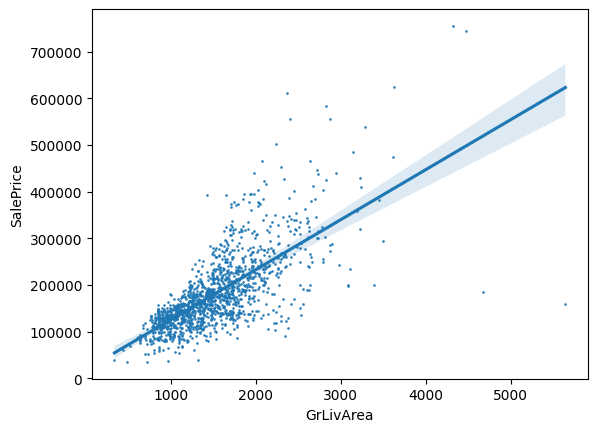

In [13]:
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1})

Můžeme použít i krabicový graf, abychom se podívali, v jaké cenové relaci se nechází cena domu.

<Axes: xlabel='SalePrice'>

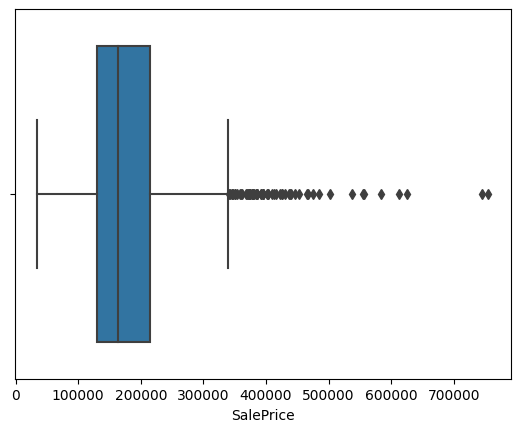

In [14]:
sns.boxplot(data, x="SalePrice")

Odlehlá pozorování vadí především z důvodu, že mají tendenci "přitahovat" si k sobě regresní funkci. To pak může regresní funkci vychýlit a ona bude zobrazovat chybné výsledky.

Teoreticky je možné, že bychom zdánlivě velmi vysokou nebo nízkou cenu domu dokázali vysvětlit pomocí dalších sloupců - například může být nový, ve vynikajícím stavu, má velký pozemek, je na dobrém místě atd. Pokud ale do dat zařadíme více sloupců, nemůžeme už si data zobrazit graficky.

### Čtení na doma: Cookova vzdálenost

V rámci regrese existuje měřítko, které říká, jak moc jeden konkrétní bod ovlivňuje regresní funkci. Takovýmu měřítku říkáme Cookova vzdálenost (*Cook's distance*). Cookova vzdálenost jednoho uvažuje, o kolik by se regresní funkce "posunula", pokud bychom tento bod vynechali (anglicky toto ozančujeme jako *leverage*) a vzdálenost bodu od regresní funkce.

In [15]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + YearBuilt + FullBath + HalfBath + GarageArea"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cook Distance
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1.915350e-05
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3.295641e-05
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.710510e-07
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.458094e-03
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4.120890e-04


Jednoduché pravidlo (*rule of the thumb*) doporučuje odstranit hodnoty s Cookovou vzdáleností vyšší než 1.

In [16]:
data = data[data['Cook Distance'] < 1]
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     833.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:37:27   Log-Likelihood:                -17355.
No. Observations:                1459   AIC:                         3.473e+04
Df Residuals:                    1451   BIC:                         3.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.629e+05   9.08e+04     -9.508      0.000   -1.04e+06   -6.85e+05
OverallQual  1.905e+04   1073.847     17.740      0.000    1.69e+04    2.12e+04
GrLivArea      63.3108      3.420     18.513      0.000      56.602      70.019
TotalBsmtSF    37.7036      3.047     12.372      0.000      31.726      43.681
YearBuilt     399.3179     47.693      8.373      0.000     305.764     492.872
FullBath    -9607.9940   2674.084     -3.593      0.000   -1.49e+04   -4362.511
HalfBath    -1784.6415   2422.955     -0.737      0.462   -6537.511    2968.228
GarageArea     43.9541      5.742      7.654      0.000      32.690      55.218
==============================================================================
Omnibus:                      413.680   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14644.507
Skew:                           0.622   Prob(JB):                         0.00
Kurtosis:                      18.471   Cond. No.                     2.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Robustní regrese

Regresním modelům vadí i další věc, která se označuje strašidelným pojmem heteroskedasticita (*heteroscedasticity*). Tím je myšleno, že data mají stejnou variabilitu. Vraťme se k regresnímu grafu. Zde vidíme, že čím je dům větší, tím jsou ceny více rozptýlené. Opět platí, že se díváme pouze na dvě proměnné, i když ve výsledném modelu jich máme více.

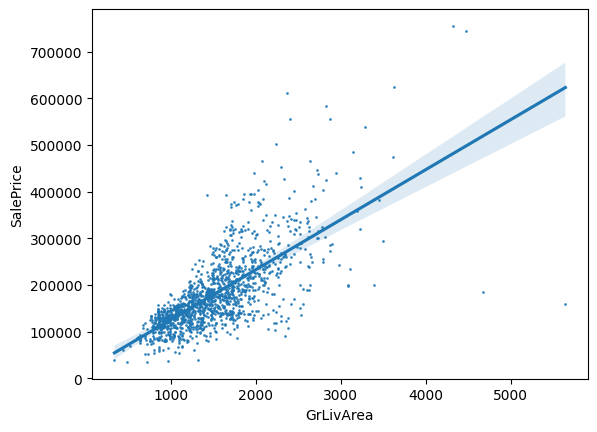

In [17]:
data = pd.read_csv("house_prices.csv")
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1})

Pokud máme podezření na heteroskedasticitu, můžeme použít jiný typ regrese, která je označovaná jako robustní regrese. Ta přiřazuje jednotlivým pozorováním různé váhy, čímž vykompenzuje vliv měnící se variability dat. Robustní regrese je alternativním řešením i pro odlehlá pozorování, protože dává menší váhu odlehlejším pozorováním a tím zeslabí jejich vliv na regresní funkci.

In [18]:
formula = "SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + YearBuilt + FullBath + HalfBath + GarageArea"
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            RLM   Df Residuals:                     1452
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 23 Oct 2023                                         
Time:                        23:37:28                                         
No. Iterations:                     6                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.516e+05   6.52e+04    -13.054      0.000    -9.8e+05   -7.24e+05
OverallQual   1.68e+04    766.452     21.916      0.000    1.53e+04    1.83e+04
GrLivArea      58.1283      2.431     23.913      0.000      53.364      62.893
TotalBsmtSF    31.4140      2.127     14.766      0.000      27.244      35.584
YearBuilt     405.2442     34.289     11.818      0.000     338.039     472.450
FullBath    -7314.6164   1910.839     -3.828      0.000   -1.11e+04   -3569.440
HalfBath    -3183.1509   1742.865     -1.826      0.068   -6599.103     232.801
GarageArea     43.4179      4.130     10.513      0.000      35.323      51.513
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

Přehled různých metod, jak snížit váhu koeficientů, jsou [zde](https://www.statsmodels.org/dev/examples/notebooks/generated/robust_models_1.html).

### Čtení na doma

Jak vlastně regrese funguje? Přidejme si do tabulky `data` dva sloupce:

- `fittedvalues` (vyrovnané hodnoty) jsou hodnoty odhadované modelem, tj. cena domu, kterou by predikoval náš model na základě jeho velikosti,
- `resid` (rezidua) je rozdíl mezi skutečnou cenou domu a predikovanou cenou.

V tabulce níže například vidíme, že jednomu domu model predikovat cenu cca 209905, ale cena domu ve skutečnosti byla pouze 208500. Tím pádem se model "zmýlil" o 1405, což je hodnota rezidua. Protože model predikoval vyšší cenu, je reziduum záporné.

In [21]:
data["residuals"] = res.resid
data["predictions"] = res.fittedvalues
data[["SalePrice", "residuals", "predictions"]].head()

,SalePrice,residuals,predictions
0,208500,-1405.544558,209905.544558
1,181500,13258.266724,168241.733276
2,223500,5371.623822,218128.376178
3,140000,-46088.606592,186088.606592
4,250000,-25436.628361,275436.628361


Regrese funguje na principu minimalizace druhé mocniny součtu reziduí. Tj. vypočtené koeficienty minimalizují *druhou mocninu součtu reziduí*. Proto je tato metoda často označována jako metoda nejmenších čtverců (*OLS* - *Ordinary Least Squares*).

Pro regresi je dále důležité, aby rezidua měla normální rozdělení. Pro testování normality je možné využít standardní testy, modul `statsmodels` nám nabízí výsledky dvou testů: Omnibus testu a Jarque-Bera testu. Oba fungují na základě tvaru distribuční funice - šikmosti (jak moc je hustota symetrická) a špičatosti (jak rychle hustota od středu klesá). Poskytnuté p-hodnoty (ty jsou vždy označené jako `Prob.`) jsou v obou případech větší než 0.05, nezamítáme tedy hypotézu normality reziduí.

<Axes: ylabel='Count'>

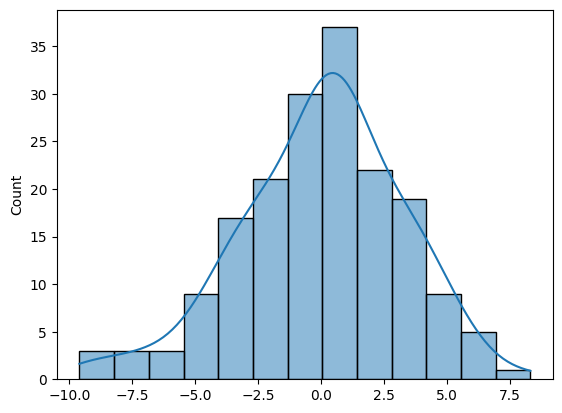

In [ ]:
sns.histplot(res.resid, kde=True)

Normalita reziudí nám umožní použít řady údajů, které nám modul vypočítal. Dvě z nich jsou následující:

- `F-statistic` - testuje hypotézu, zda je model statisticky významný jako celek. To oceníme hlavně v případě modelu s více proměnnými. Pokud by byla p-hodnota více než 0.05, je model statisticky nevýznamný (tj. nic nám neříká).
- `P>|t|` - testuje hypotézu, zda je statisticky významný konkrétní koeficient (o něm už jsme mluvili). 

Použít ale můžeme základní měřítko kvality modelu, což je koeficient determinace `R-squared`. Ten nám říká, kolik procet rozptylu vysvětlované proměnné jsme naším modelem vysvětlili.

Více informací najdete například v [tomto článku](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a).

# Cvičení

## Kvalita betonu

V souboru [Concrete_Data_Yeh.csv](Concrete_Data_Yeh.csv) najdeš informace o kvalitě betonu. Sloupce 1-7 udávají množství jednotlivých složek v kg, které byly přimíchány do krychlového metru betonu (např. cement, voda, kamenivo, písek atd.). Ve sloupci 8 je stáří betonu a ve sloupci 9 kompresní síla betonu v megapascalech. Vytvoř regresní model, který bude predikovat kompresní sílu betonu na základě všech množství jednotlivých složek a jeho stáří. Zhodnoť kvalitu modelu.

Která ze složek betonu ovlivňuje sílu betonu negativně (tj. má záporný regresní koeficient)?

```py
formula = "csMPa ~ slag + flyash"
```

Řešení příkladu je [zde](reseni.ipynb). Video s řešením příkladu je [zde](https://youtu.be/iGXlEpf0yb4).

## Bonus: Pojišťovna

V souboru [expenses.csv](expenses.csv) najdeš informace o platbách za pojištěnce jedné pojišťovny: věk, pohlaví, BMI (index počítaný jako hmotnost dělená výškou), počet dětí, kuřák/nekuřák, region a platby za pojištěnce. 

Vytvoř regresní model, který odhadne platby za pojištěnce na základě jeho věku a indexu BMI.

V regresi se často využívá metoda označovaná jako One Hot Encoding, která slouží ke zpracování nečíselných (kategoriálních) dat. Metodu aplikuješ tak, že vytvoříme sloupec pro každou hodnotu, které kategoriálních hodnota může nabýt. Pro každý řádek je pak hodnota příslušného sloupce 1 a ostatních sloupců 0. Vytvoř tedy sloupec `smoker_number` (takovému sloupci se říká *dummy* proměnná), který bude obsahovat hodnotu 1, pokud je ve sloupci `smoker` hodnota `yes`, a v opačném případě 0. Můžeš využít metodu `apply()` nebo funkci `numpy.where()`. Dále přidej nově vytvořený sloupec do regresního modelu. O kolik se zvýšil koeficient determinace?

Takový postup vytváření je poměrně pracný, hlavně v případě, že proměnná nabývá více různých hodnot. `pandas` k tomu nabízí funkci `get_dummies()`. Vyzkoušej si funkci použitím příkazu níže.

```py
smoker = pandas.get_dummies(data["smoker"])
smoker
```

Dále připoj data do původní tabulky. Připojení je nutné provést s využitím indexů, protože tabulky nemají společný sloupec. Proto využij funkci `merge()` s parametry `left_index=True` a `right_index=True`.

```py
data = pandas.merge(data, smoker, left_index=True, right_index=True)
data
```

Nyní využij tento sloupec ve svém regresním modelu.

Řešení bonusu je [zde](reseni.ipynb). Video s řešením příkladu je [zde](https://youtu.be/oJPz7Ui4ZkE).